In [13]:
import sys
from pathlib import Path
ROOT = Path.cwd().parent          # eine Ebene über notebooks/
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils_stats import iqr, trimmed_mean, tukey_fences, tukey_outliers, modified_z_score, ecdf, z_score, create_na_table
from src.utils_plots import hist_kde, box_violin, plot_ecdf, hist_with_fences, plot_qq

### Checkliste für Ausreisser Handling

- nach missing values prüfen
- Tukey- und mod. Z-Test anwenden
- Heavy Tails vs. echte Fehler unterscheiden
- Strategie wählen und dokumentieren

### Heatmap Missing Values

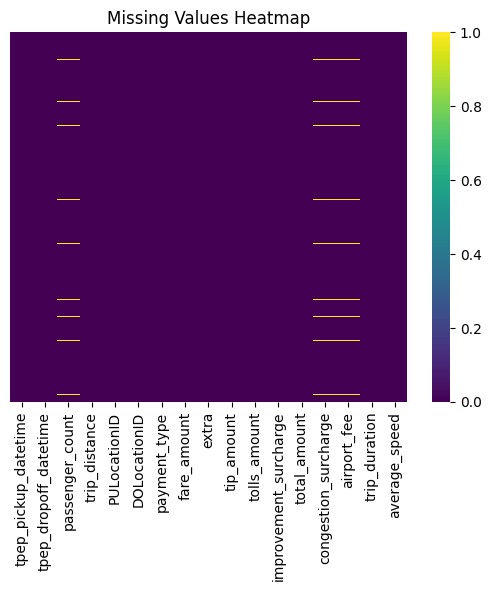

In [5]:
df = pd.read_csv("../data/Taxi_final_1M.csv")
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Wir können also sehen das bei passenger_count, congestion_surcharge und airport_fee vermutlich in der gleichen Datenreihe fehlende Werte haben. 
Um dies zu bestätigen müssen wir, wie in Abschnitt 2 bereits gemacht die genaue Anzahl bestimmen.

In [10]:
missing_count = df.isnull().sum()
missing_percent = df.isnull().mean() * 100

# Erstelle einen übersichtlichen DataFrame
missing_df = pd.DataFrame({
    'Anzahl fehlender Werte': missing_count,
    'Prozent fehlender Werte': missing_percent
})

missing_df = missing_df[missing_df['Anzahl fehlender Werte'] > 0]

print("Fehlende Werte im Datensatz:")
print(missing_df)

Fehlende Werte im Datensatz:
                      Anzahl fehlender Werte  Prozent fehlender Werte
passenger_count                        34408                  3.44081
congestion_surcharge                   34408                  3.44081
airport_fee                            34408                  3.44081
average_speed                            320                  0.03200


Unsere Vermutung hat sich bestätigt, es ist genau die gleiche Anzahl an fehlenden Werten bei den Drei. Zudem können wir feststellen das es noch eine neue Spalte gibt mit fehlenden Werten und zwar average_speed. Diese erklären sich wahrscheinlich dadurch, dass bei der erstellung von der Spalte ein paar Werte auf None gesetzt wurden.

Bevor wir diese Missing Values beheben, kopieren wir den Datensatz um das original beizubehalten.

In [15]:
# Pfade definieren
src_path = "../data/Taxi_final_1M.csv"
dest_path = "../data/Taxi_final_1M_clean.csv"

# Prüfen, ob Zieldatei bereits existiert
if os.path.exists(dest_path):
    print(f"Die Datei '{dest_path}' existiert bereits. Kopiervorgang abgebrochen.")
else:
    # CSV einlesen und speichern
    df = pd.read_csv(src_path)
    df.to_csv(dest_path, index=False)

Für congestion_surcharge werden wir bei den fehlenden Werten 2.5 einfühgen, denn dies kommt mit Abstand am meisten vor, es ist ein Verkehrszuschlag der bei den Yellow Taxis 2.5$ ist und eigentlich immer verrechnet wird